# Import pairs that were selected in the stock_selection

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np



stocks = pd.read_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/stocks.csv", index_col = 0)
pairs = pd.read_csv("C:/Users/adamt/OneDrive - Wirtschaftsuniversität Wien - IT-SERVICES/Desktop/masterThesis/pairs2.csv", index_col = 0)

pairs = pairs.reset_index(drop=True)

(np.float64(-4.165539583500638), np.float64(0.0007532132351721758), 9, 2506, {'1%': np.float64(-3.432962135264372), '5%': np.float64(-2.862694028699462), '10%': np.float64(-2.567384333962417)}, np.float64(19513.397330994703))


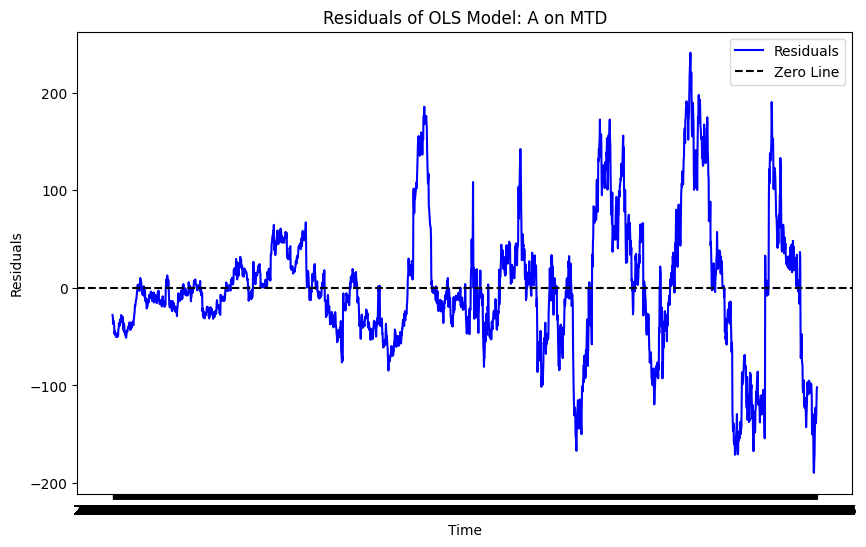

In [3]:
#%pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


ticker1,ticker2  = pairs.iloc[0]


stock1, stock2 = stocks[ticker1],stocks[ticker2]

x = sm.add_constant(stock1)  # Add constant after dropping NaNs
y = stock2


model = sm.OLS(y,x).fit()

# Calculate residuals
residuals = model.resid

print(adfuller(residuals))
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')
plt.title(f'Residuals of OLS Model: {ticker1} on {ticker2}')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


## Trading Strategy

 - the profit of buying one share of stock 2 and selling \beta share of stock 1 for the period is given by the change in the spread for that period.
 - We use the two-step Engle-Granger approach (Engle and Granger, 1987) to test for the existence of cointegration between nominated pairs and to estimate cointegration coeficient 
 - we simultaneously open and close long and short positions when the normalized spread diverges beyond 2. By construction, if the spread drops below -2, we buy 1 dollar worth of stock 2 and sell short
 Beta dollar worth of stock 1. Equivalently, we sell short 1/Beta dollar worth of stock 2 and buy 1 dollar worth of stock 1, when the spread moves above the +2 threshold.
 - We close both positions once the spread returns to zero, which translates into the pair returning to their long-term equilibrium
 -The pair is again monitored for other potential round-trip trades for the remainder of the trading period.